# Task 1 – Curse of dimensionality and effect of sample size

For D from 1 to 15 dimensions, simulate 1000 random D-dimensional points, where the value in each
dimension is uniformly randomly distributed between -1 and +1. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
np.random.seed(3136)

In [2]:
def simulate_points(D_max, n_points, D_min=1):
    points = {}
    for D in range(D_min,D_max+1):
        points[D] = np.random.rand(npoints, D)*2 - 1
    return points

In [3]:
npoints = int(1e3)
Dmax = 15
points = simulate_points(Dmax, npoints)

# Verify properties
print("D=14 Shape: ", points[14].shape)
print("D=13 Max: ", np.max(points[13]))
print("D=15 Min: ", np.min(points[15]))
print("All Dims: ", points.keys())

D=14 Shape:  (1000, 14)
D=13 Max:  0.9999407458587297
D=15 Min:  -0.9997681306876407
All Dims:  dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])


### a) Calculate the fraction of these points that are within distance 1 of the origin, giving an approximation of the volume of the unit hypersphere to the hypercube inscribing it. Plot this fraction as a function of D (a scatter plot of D versus the fraction). 

In [4]:
def calc_l2_dist_origin(points):
    return np.sqrt(np.sum(points**2, axis=1))

def find_hypersphere_fraction(points, r=1):
    dists = calc_l2_dist_origin(points)
    pts_in_hsphere = np.sum(dists < r)
    return pts_in_hsphere/points.shape[0]
 
fractions = np.array([[key, find_hypersphere_fraction(points[key])] for key in points])

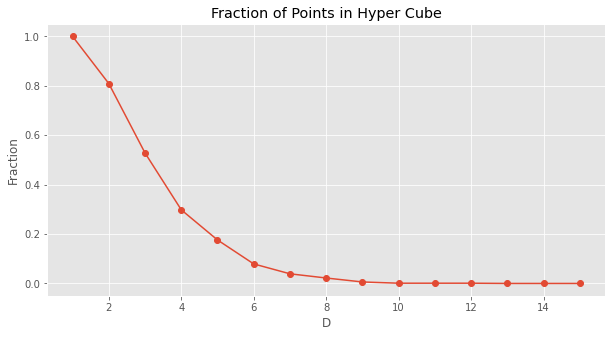

In [5]:
plt.figure(figsize=(10,5))
plt.plot(fractions[:, 0], fractions[:, 1], marker="o")
plt.xlabel("D")
plt.ylabel("Fraction")
plt.title("Fraction of Points in Hyper Cube")
plt.show()

### b) Use the value of this fraction at D = 2 and D = 3 to get estimates for the value of pi (Π) as you know the area (for D = 2) and volume (for D = 3) formula for these cases. 

$\quad$ The formula of the area of the circle is $\pi r^2$ for D=2. And the area of the square is $(2r^2)$. By combining this information with the fraction: $\frac{\pi r^2}{2r^2} = \textit{fraction (f)}$. Since the fraction is calculated using simulation, it is possible to obtain an estimation by manipulating equations to obtain $4f=\pi$ 

In [6]:
print("D=2 Estimated pi: ", 4*fractions[1,1])

D=2 Estimated pi:  3.236


Similarly ratio of $\frac{4}{3}\pi r^3$ and $(2r)^3$ is known. Then $\pi$ can be calculated using formula $6f=\pi$

In [7]:
print("D=3 Estimated pi: ", 6*fractions[2,1])

D=3 Estimated pi:  3.168


### c) Perform the calculations in part (b) with larger sample sizes. You can use the following set: {5000, 10000, 25000, 50000, 100000}. Visualize the estimated Π for D = 2 and D = 3 cases. Comment on your results

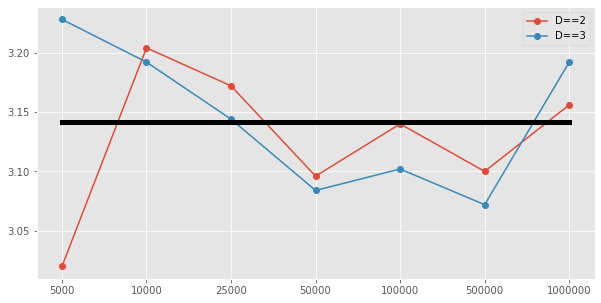

In [8]:
def calc_pi_est_2d(points):
    frac = find_hypersphere_fraction(points)
    return 4*frac

def calc_pi_est_3d(points):
    frac = find_hypersphere_fraction(points)
    return 6*frac

point_sizes = (5000,10000, 25000, 50000, 100000, 500000, 1000000)

d2_estimates = []
d3_estimates = []

for size in point_sizes:
    simulated = simulate_points(D_max=3, n_points=size, D_min=2)
    d2_points = simulated[2]
    d3_points = simulated[3]
    
    d2_estimates.append(calc_pi_est_2d(d2_points))
    d3_estimates.append(calc_pi_est_3d(d3_points))
    
plt.figure(figsize=(10,5))
point_sizes_str = [str(x) for x in point_sizes]
plt.plot(point_sizes_str, d2_estimates, label="D==2", marker = "o")
plt.plot(point_sizes_str, d3_estimates, label="D==3", marker = "o")
plt.plot(point_sizes_str, [np.pi]*len(point_sizes), linewidth=5, color="Black")
plt.legend()
plt.show()

    


This is an example of Monte Carlo simulation. We expect to have better estimate as the number of simulated points increase. This plot somehow implies this phenomona by getting close to true value after 25000 points. If we would calculate the variance of the estimates we would see the variance of the estimate decreases as the number of points increase. 

### d) Repeat this simulation, sampling 1000 D-dimensional points from 1 to 15 dimensions, where the value in each dimension is uniformly randomly distributed between -1 and +1. For each value of D, generate an additional 100 test instances and calculate the distance to each test instance’s nearest neighbor. Plot the average distance from the test instances to their nearest neighbors as a function of D.

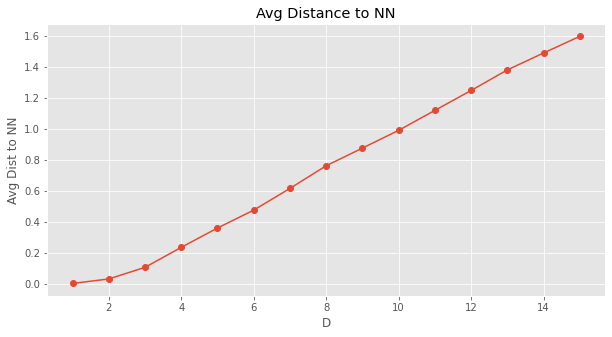

In [9]:
npoints = 1000
ntestpoints = 100
Dmax=15

points = simulate_points(Dmax, npoints)
test_points = simulate_points(Dmax, ntestpoints)

def find_nn_dist(points, test_point):
    dists = np.sqrt(np.sum((points-test_point)**2, axis=1))
    return np.min(dists)

nn_dists = [
    (D, np.mean([find_nn_dist(points[D], test_points[D][i]) for i in range(ntestpoints)])) for D in points
]
nn_dists = np.array(nn_dists)

plt.figure(figsize=(10,5))
plt.plot(nn_dists[:,0], nn_dists[:,1], marker="o")
plt.xlabel("D")
plt.ylabel("Avg Dist to NN")
plt.title("Avg Distance to NN")
plt.show()

    
    

It is possible to observe curse of dimentionality from here. As the number of dimensions increase the distance to nearest neighbor increases since being close to a point in all dimensions in high dimensional space is less probable. Therefore finding similar points becomes harder and harder as the number of dimensions increase.

# Task 2 – Practicing data manipulation skills on images

### a) Read image as a variable in R/Python. You need to install “jpeg” package to read image into a variable if you use R. For Python, an alternative is to use matplotlib package. What is the structure of the variable that stores the image? What is the dimension? a. Display the image

(500, 500, 3)


array([[[197, 176, 155],
        [192, 174, 152],
        [192, 174, 152],
        ...,
        [217, 202, 183],
        [218, 203, 184],
        [218, 203, 184]],

       [[198, 177, 156],
        [194, 176, 154],
        [193, 175, 153],
        ...,
        [216, 201, 182],
        [217, 202, 183],
        [218, 203, 184]],

       [[200, 179, 158],
        [195, 177, 155],
        [193, 175, 153],
        ...,
        [215, 200, 181],
        [216, 201, 182],
        [217, 202, 183]],

       ...,

       [[ 50,  46,  43],
        [ 49,  45,  42],
        [ 49,  45,  42],
        ...,
        [169, 115,  87],
        [161, 107,  79],
        [157, 103,  75]],

       [[ 51,  47,  44],
        [ 50,  46,  43],
        [ 50,  46,  43],
        ...,
        [164, 110,  82],
        [156, 102,  74],
        [152,  98,  70]],

       [[ 52,  48,  45],
        [ 51,  47,  44],
        [ 49,  45,  42],
        ...,
        [162, 108,  80],
        [154, 100,  72],
        [150,  96,  68]]

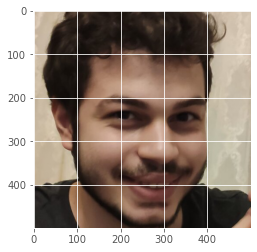

In [10]:
img = plt.imread("./HW1/rsz_face.jpg")
print(img.shape)
plt.imshow(img)
img

### b) Display each channel as separate image

Channel:  0


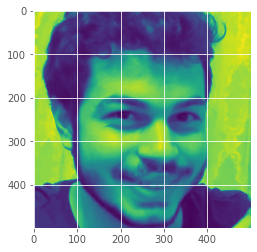

Channel:  1


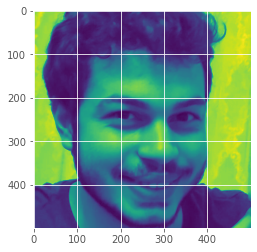

Channel:  2


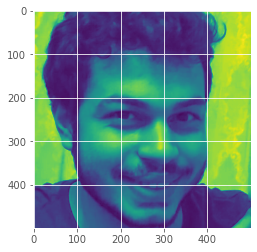

In [11]:
for ch in range(3):
    print("Channel: ", ch)
    plt.imshow(img[:,:, ch])
    plt.show()

### c) For each channel, take the average of the columns and plot the average as a line plot for each channel on a single plot. 

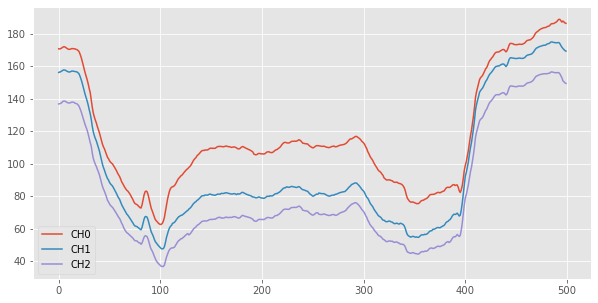

In [12]:
plt.figure(figsize=(10,5))
for ch in range(3):
    ch_vals = img[:,:, ch]
    col_means = np.mean(ch_vals, axis = 0)
    plt.plot(list(range(col_means.shape[0])), col_means, label=f"CH{ch}")
plt.legend()
plt.show()

### d) For each channel, subtract one half of the image from the other half (choice of halves is up to you but dividing the head image vertically into two parts make more sense). If you observe negative pixel values, you can make them equal to zero. Then: • Display the new image. • Display each channel separately as separate image

CH:  0


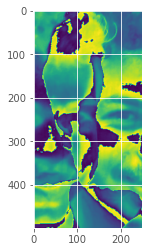

CH:  1


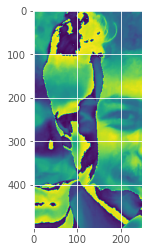

CH:  2


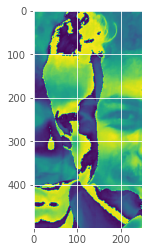

ALL_CHs


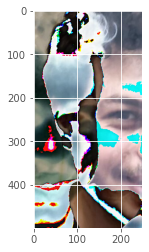

In [13]:
HALF_SIZE = img.shape[1]//2
new_size = list(img.shape)
new_size[1] = HALF_SIZE  
new_img = np.zeros(new_size,dtype=int)
for ch in range(3):
    print("CH: ", ch)
    ch_vals = img[:,:, ch]
    first_half = ch_vals[:, :HALF_SIZE]
    second_half = ch_vals[:, HALF_SIZE:]
    new_ch = first_half - second_half
    new_img[:,:,ch] = new_ch
    plt.imshow(new_ch)
    plt.show()
print("ALL_CHs")
plt.imshow(new_img)
plt.show()

### e) In order to create a noisy image, add a random noise from uniform distribution with minimum value of 0 and a maximum value of “0.1 * maximum pixel value observed” to each pixel value for each channel of original image. • Display the new image. • Display each channel separately as separate image.

MAX_VAL:  233
Noisy Image:


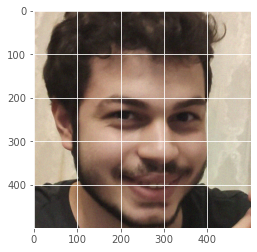

CH:  0


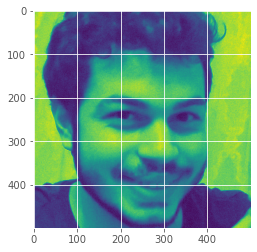

CH:  1


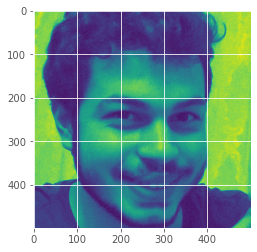

CH:  2


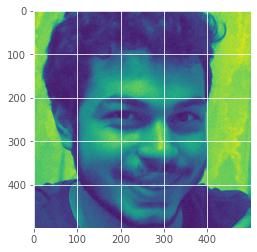

In [14]:
MAX_VAL = np.max(img)
print("MAX_VAL: ", MAX_VAL)
max_noise = int(0.1*MAX_VAL)

noise =  np.random.randint(0, max_noise + 1, size=img.shape)
# plt.hist(noise.flatten(), bins=MAX_VAL)
# plt.title("Distribution of Noise")
# plt.show()

print("Noisy Image:")
noisy_image = img + noise
plt.imshow(noisy_image)
plt.show()

for ch in range(3):
    print("CH: ", ch)
    noisy_channel = noisy_image[:,:,ch]
    plt.imshow(noisy_channel)
    plt.show()
    